In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL

In [3]:
(X_train,_y_train), (X_test,_y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

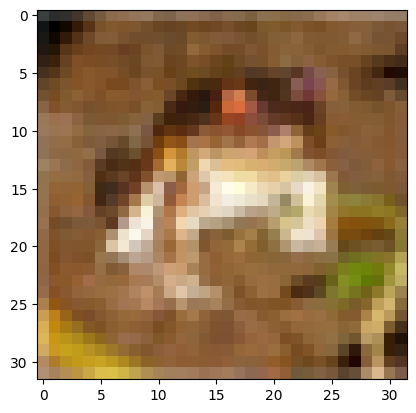

In [7]:
plt.imshow(X_train[0])

In [14]:
lables='''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''

In [16]:
lables=lables.split()

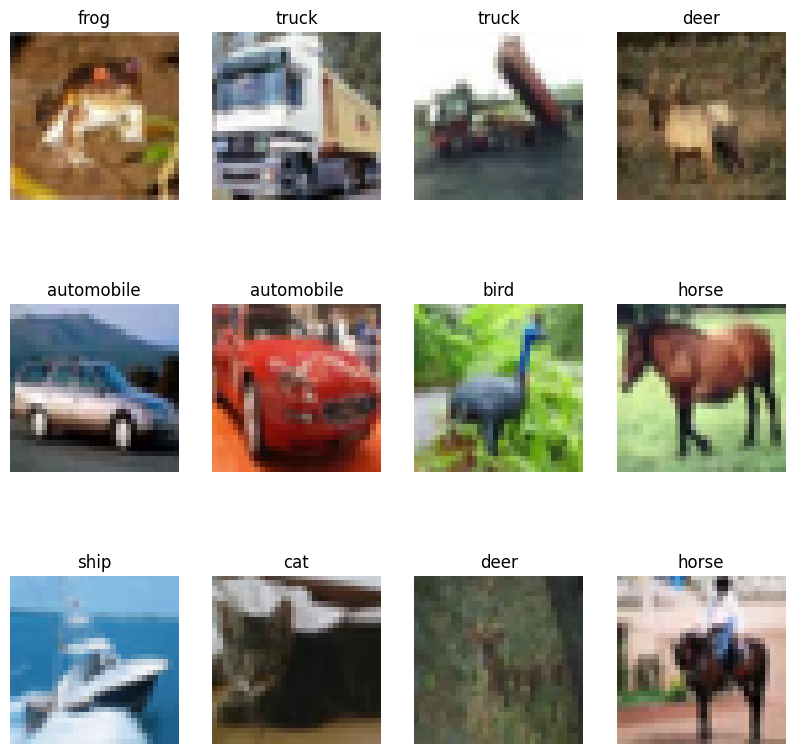

In [21]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    plt.title(lables[_y_train[i][0]])
    plt.axis("off")

In [29]:
model=keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(32,32,3)),
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')




])

In [30]:
model.compile(optimizer="Adam",loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [31]:
model.fit(X_train, _y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5170 - accuracy: 0.4478
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1658 - accuracy: 0.5885
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9992 - accuracy: 0.6494
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9036 - accuracy: 0.6816
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8345 - accuracy: 0.7091
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7710 - accuracy: 0.7309
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7207 - accuracy: 0.7472
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6739 - accuracy: 0.7642
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6330 - accuracy: 0.7771
Epoch 10/10
1563/1563 [==============================] - 58s 37m

In [37]:
preds=[np.argmax(i) for i in model.predict(X_test)]

313/313 [==============================] - 4s 13ms/step


In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [42]:
print(confusion_matrix(preds,_y_test))

[[779  29  94  21  21  22  12  24  60  38]
 [ 19 808   4  12   1   8   4   5  18  66]
 [ 24   3 527  55  43  30  45  19   7   5]
 [ 12   5  74 480  53 135  74  37   8  10]
 [ 16   8 122  89 726  65  72  80   8   9]
 [  3   5  76 219  41 661  33  68   5   8]
 [  6  11  38  36  22  12 720   5   1   5]
 [  5   5  21  33  65  45  12 729   1  10]
 [104  30  38  33  25  12  17  16 872  50]
 [ 32  96   6  22   3  10  11  17  20 799]]


Text(50.722222222222214, 0.5, 'Predicted')

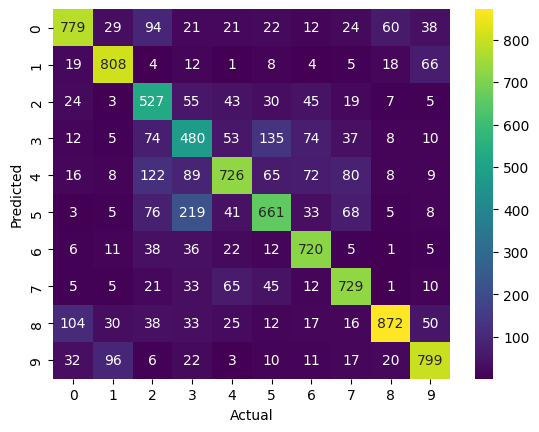

In [45]:
sns.heatmap(confusion_matrix(preds,_y_test),cmap="viridis",fmt="d",annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

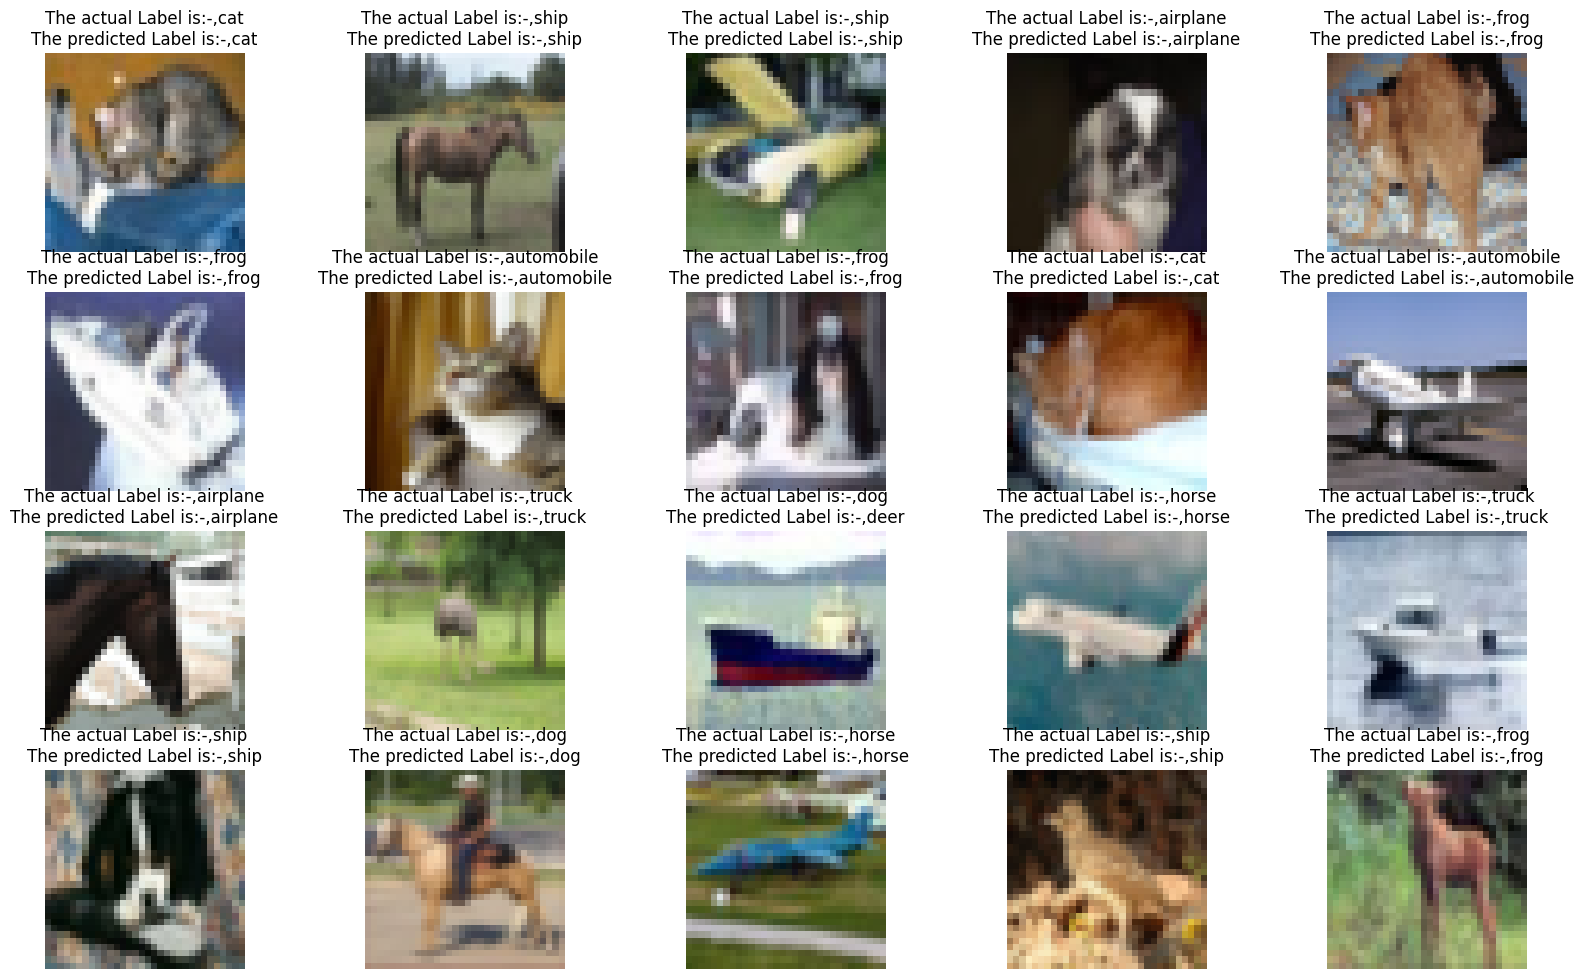

In [68]:
plt.figure(figsize=(20,15))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[-i])
  plt.title(f"The actual Label is:-,{lables[_y_test.reshape(-1,)[i]]}\nThe predicted Label is:-,{lables[preds[i]]}")
  plt.axis("off")

In [65]:
_y_test.reshape(-1,)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)